In [8]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [9]:
print(fuji[:10])
#左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。
#標高と距離の単位はメートルです。300地点のデータです。
print(fuji.shape)

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]
(300, 5)


【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

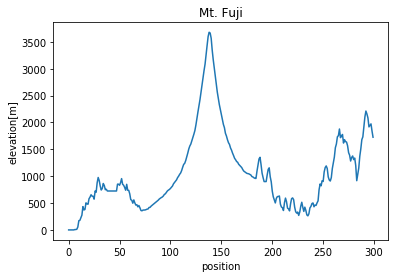

In [10]:
import matplotlib.pyplot as plt

plt.plot(fuji[:,0], fuji[:,3])
plt.title('Mt. Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [11]:
def compute_grad(n):
    dn=n-(n-1)
    dele=fuji[n,3]-fuji[n-1,3]
    return dele/dn



In [12]:
compute_grad(136)

168.35000000000036

【問題3】移動先の地点を計算する関数を作成

In [13]:
def move(n,alpha=0.2):
    return n - alpha * compute_grad(n)

In [14]:
move(130)

102.53999999999996

【問題4】山を下る関数を作成

In [15]:
import math

def descending(n=136, alpha=0.2):
    pos_n=n
    positions=[pos_n]
    for _ in range(100000):
        pos_n=int(math.floor(move(pos_n,alpha)))
        if pos_n<=0:
            pos_n=0
            positions.append(pos_n)
            return positions
        elif pos_n>=299:
            pos_n=299
            positions.append(pos_n)
            return positions
        
        if len(positions)>=50:
            if (pos_n<=positions[-49]+1) or (pos_n>=positions[-49]-1):
                positions.append(pos_n)
            return positions
        
        positions.append(pos_n)
            
    return positions

In [16]:
des=descending()

In [17]:
print(des)

[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73]


【問題5】下山過程の可視化

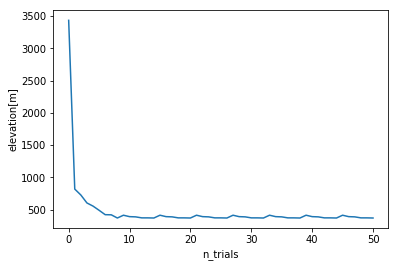

In [18]:
plt.plot(np.arange(len(des)), fuji[des,3])
plt.xlabel('n_trials')
plt.ylabel('elevation[m]')
plt.show()

【問題6】初期値の変更

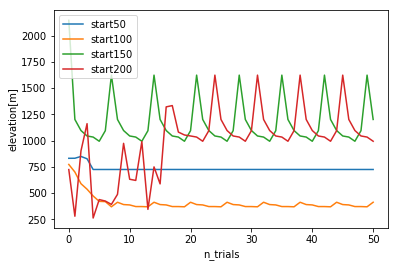

In [19]:
for i in [50,100,150,200]:
    des=descending(n=i)
    plt.plot(np.arange(len(des)),fuji[des,3], label='start{}'.format(i))

plt.xlabel('n_trials')
plt.ylabel('elevation[m]')
plt.legend()
plt.show()

In [20]:
fuji[[50,100,150,200],3]

array([ 831.  ,  772.58, 2146.01,  723.66])

問題7】（アドバンス問題）ハイパーパラメータの変更

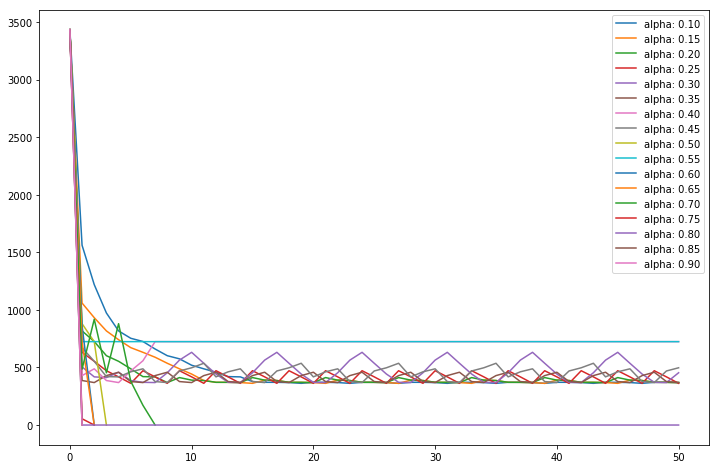

In [32]:
alphas=np.arange(0.1,0.9+0.05, 0.05)
plt.subplots(figsize=(12,8))
for i in alphas:
    des=descending(alpha=i)
    plt.plot(np.arange(len(des)),fuji[des,3], label='alpha: {:.2f}'.format(i))
    
plt.legend()
plt.show()

In [22]:
alphas

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])

SyntaxError: 'return' outside function (<ipython-input-27-e7886362ea60>, line 3)